# Metacritic Score Datasets (Feb 2023)

## Load Packages and Functions

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
import sys
sys.path.append('/Users/shantellesmith/Github/movie_rating_prediction/src')
from language_processing import *

## Load Data and Check Content/Size

In [ ]:
df_movies = pd.read_csv('../../data/raw/movies.csv')
df_games = pd.read_csv('../../data/raw/games.csv')
df_tv = pd.read_csv('../../data/raw/tv.csv')
# df_music = pd.read_csv('/home/jupyter-shantelle/music.csv')

In [ ]:
df_movies.head()

,id,metascore,rating,release_date,sort_no,summary,title,user_score
0,549123,94,TV-14,"July 26, 1989",101,A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9
1,522228,94,PG-13,"December 8, 2000",102,"In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2
2,550614,94,G,"September 11, 1970",103,"In a French forest in 1798, a child is found w...",The Wild Child,6.5
3,549303,94,TV-PG,"January 15, 1943",104,A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2
4,539956,94,PG,"June 19, 2015",105,"Growing up can be a bumpy road, and it’s no ex...",Inside Out,8.7


In [ ]:
df_games.head()

,id,metascore,platform,release_date,sort_no,summary,title,user_score
0,543718,91,PC,"August 18, 2020",301,"From light planes to wide-body jets, fly highl...",Microsoft Flight Simulator,7.1
1,555108,91,PC,"December 8, 2022",302,"Take up your sword, channel your magic or boar...",Chained Echoes,8.7
2,106820,91,PlayStation 2,"November 7, 2005",303,"Strap on your Guitar Hero SG controller, plug-...",Guitar Hero,8.5
3,110775,91,PC,"November 13, 2008",304,"Players last visited Northrend in ""Warcraft II...",World of Warcraft: Wrath of the Lich King,7.7
4,142864,91,Wii,"October 26, 2010",305,Rock Band returns with the third iteration of ...,Rock Band 3,6.8


In [ ]:
df_tv.head()

,id,metascore,release_date,sort_no,summary,title,user_score
0,72329,99,"October 26, 2016",1,Daniel tries to start a new life outside of Pa...,Rectify: Season 4,8.2
1,738,99,"July 19, 1995",2,Comic Garry Shandling draws upon his own talk ...,The Larry Sanders Show: Season 4,4.8
2,51124,99,"September 19, 1995",3,One of several crime and law dramas created by...,Murder One: Season 1,4.6
3,740,99,"March 15, 1998",4,Comic Garry Shandling draws upon his own talk ...,The Larry Sanders Show: Season 6,4.1
4,46560,99,"July 15, 2012",5,The final season for the award-winning drama b...,Breaking Bad: Season 5,9.7


In [ ]:
print(df_movies.shape, df_games.shape, df_tv.shape)

(15325, 8) (20022, 8) (3298, 7)


In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15325 entries, 0 to 15324
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            15325 non-null  int64 
 1   metascore     15325 non-null  int64 
 2   rating        14201 non-null  object
 3   release_date  15325 non-null  object
 4   sort_no       15325 non-null  int64 
 5   summary       15322 non-null  object
 6   title         15325 non-null  object
 7   user_score    15325 non-null  object
dtypes: int64(3), object(5)
memory usage: 957.9+ KB


In [ ]:
df_movies.drop('id',axis=1,inplace=True)

In [ ]:
df_movies['user_score'] = df_movies['user_score'].replace('tbd',np.nan).astype('float')

In [ ]:
df_movies.describe()

,metascore,sort_no,user_score
count,15325.000000,15325.000000,12116.000000
mean,59.180555,7663.000000,6.624208
std,17.076007,4424.090773,1.364717
min,1.000000,1.000000,0.300000
25%,48.000000,3832.000000,5.900000
50%,61.000000,7663.000000,6.800000
75%,72.000000,11494.000000,7.600000
max,100.000000,15325.000000,9.200000


<AxesSubplot:>

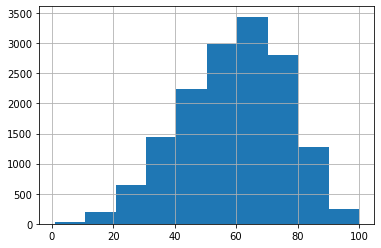

In [ ]:
df_movies['metascore'].hist()

<AxesSubplot:>

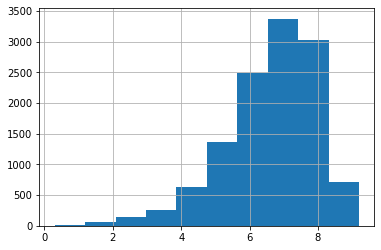

In [ ]:
df_movies['user_score'].hist()

In [ ]:
df_movies['rating'].unique()

array(['TV-14', 'PG-13', 'G', 'TV-PG', 'PG', 'R', 'Passed', 'Not Rated',
       'TV-G', 'TV-MA', 'Approved', nan, 'Unrated', 'GP', 'M', 'M/PG',
       'NR', 'NC-17', 'Open', 'X', 'MA-17', 'PG--13', 'PG-13`', 'TV-Y7',
       'TV-Y7-FV'], dtype=object)

In [ ]:
df_movies['rating'] = df_movies['rating'].replace(['PG--13','PG-13`'],'PG-13').replace(['NR','Unrated'],'Not Rated')
df_movies['rating'] = df_movies['rating'].replace('X','NC-17') #'X' is an outdated rating replaced with 'NC-17'
df_movies['rating'].unique()

array(['TV-14', 'PG-13', 'G', 'TV-PG', 'PG', 'R', 'Passed', 'Not Rated',
       'TV-G', 'TV-MA', 'Approved', nan, 'GP', 'M', 'M/PG', 'NC-17',
       'Open', 'MA-17', 'TV-Y7', 'TV-Y7-FV'], dtype=object)

In [ ]:
df_movies['release_date'] = df_movies['release_date'].replace(['TBA','TBD 2022 or 2023'],np.nan)
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

In [ ]:
df_movies['release_year'] = df_movies['release_date'].dt.year
df_movies['release_month'] = df_movies['release_date'].dt.month
df_movies['release_quarter'] = df_movies['release_date'].dt.quarter
df_movies['release_yearweek'] = df_movies['release_date'].dt.weekofyear

In [ ]:
df_movies[df_movies['rating']=='Passed']['release_date'].max()

Timestamp('1976-06-16 00:00:00')

In [ ]:
df_movies[df_movies['title'].duplicated()].sort_values('title').head(50)

,metascore,rating,release_date,sort_no,summary,title,user_score,release_year,release_month,release_quarter,release_yearweek
11186,49,G,1996-11-27,11187,"Unleashing every ounce of Disney magic, 101 Da...",101 Dalmatians,6.1,1996.0,11.0,4.0,48.0
10849,50,NaN,2003-05-09,10850,Writer/director Helen Lesnick stars as a newly...,A Family Affair,5.3,2003.0,5.0,2.0,19.0
10147,53,PG-13,2004-05-07,10148,"When their mother dies, two brothers (Arquette...",A Foreign Affair,6.0,2004.0,5.0,2.0,19.0
7499,61,PG-13,1999-05-14,7500,Shakespeare's classic romantic comedy set in 1...,A Midsummer Night's Dream,6.5,1999.0,5.0,2.0,19.0
13882,35,R,2010-04-30,13883,"Nancy, Kris, Quentin, Jesse and Dean all live ...",A Nightmare on Elm Street,4.9,2010.0,4.0,2.0,17.0
8252,59,R,1976-12-17,8253,A has-been rock star falls in love with a youn...,A Star Is Born,4.5,1976.0,12.0,4.0,51.0
813,88,R,2018-10-05,397,"In this new take on the tragic love story, sea...",A Star Is Born,8.4,2018.0,10.0,4.0,40.0
9092,56,PG-13,2009-07-29,9093,"Romance can be risky, perplexing and filled wi...",Adam,8.0,2009.0,7.0,3.0,31.0
14876,25,R,2014-08-08,14877,In the winter of 2002 in chilly upstate New Yo...,After,NaN,2014.0,8.0,3.0,32.0
5830,66,Not Rated,2017-08-09,5831,Boris (Cédric Kahn) and Marie (Bérénice Bejo) ...,After Love,NaN,2017.0,8.0,3.0,32.0


In [ ]:
df_movies.isna().sum()

metascore              0
rating              1124
release_date         109
sort_no                0
summary                3
title                  0
user_score          3209
release_year         109
release_month        109
release_quarter      109
release_yearweek     109
dtype: int64

In [ ]:
df_movies[df_movies['summary'].isna()]

,metascore,rating,release_date,sort_no,summary,title,user_score,release_year,release_month,release_quarter,release_yearweek
8262,59,Not Rated,NaT,8263,NaN,The Nothing Factory,NaN,NaN,NaN,NaN,NaN
9021,56,R,2018-11-09,9022,NaN,Weightless,NaN,2018.0,11.0,4.0,45.0
12235,44,PG-13,1986-04-25,12236,NaN,Three Men and a Cradle,NaN,1986.0,4.0,2.0,17.0


In [ ]:
df_movies.fillna(-1,inplace=True)

<AxesSubplot:>

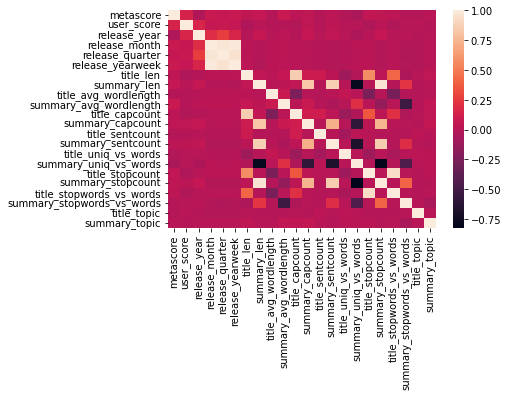

In [ ]:
# calculate the correlation matrix
corr = df_movies.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
df_movies['title_len'] = [len(i) for i in df_movies['title']]
df_movies['summary_len'] = [len(i) for i in df_movies['summary'].astype('str')]

df_movies['title_wordlen'] = [len(i.split()) for i in df_movies['title']]
df_movies['summary_wordlen'] = [len(i.split()) for i in df_movies['summary'].astype('str')]

df_movies['title_avg_wordlength'] = df_movies['title_len']/df_movies['title_wordlen']
df_movies['summary_avg_wordlength'] = df_movies['summary_len']/df_movies['summary_wordlen']

In [ ]:
df_movies['title_capcount'] = [count_capital_words(i) for i in df_movies['title']]
df_movies['summary_capcount'] = [count_capital_words(i) for i in df_movies['summary'].astype('str')]

In [ ]:
df_movies['title_punccount'] = [count_punctuations(i) for i in df_movies['title']]
df_movies['summary_punccount'] = [count_punctuations(i) for i in df_movies['summary'].astype('str')]

In [ ]:
df_movies['title_sentcount'] = [count_sent(i) for i in df_movies['title']]
df_movies['summary_sentcount'] = [count_sent(i) for i in df_movies['summary'].astype('str')]

In [ ]:
df_movies['title_uniq'] = [count_unique_words(i) for i in df_movies['title']]
df_movies['summary_uniq'] = [count_unique_words(i) for i in df_movies['summary'].astype('str')]

In [ ]:
df_movies['title_uniq_vs_words'] = df_movies['title_uniq']/df_movies['title_wordlen']
df_movies['summary_uniq_vs_words'] = df_movies['summary_uniq']/df_movies['summary_wordlen']

In [ ]:
df_movies['title_stopcount'] = [count_stopwords(i) for i in df_movies['title']]
df_movies['summary_stopcount'] = [count_stopwords(i) for i in df_movies['summary'].astype('str')]

In [ ]:
df_movies['title_stopwords_vs_words'] = df_movies['title_stopcount']/df_movies['title_wordlen']
df_movies['summary_stopwords_vs_words'] = df_movies['summary_stopcount']/df_movies['summary_wordlen']

In [ ]:
df_movies['title_nostopwords'] = [remove_stopwords(i) for i in df_movies['title']]
df_movies['summary_nostopwords'] = [remove_stopwords(i) for i in df_movies['summary'].astype('str')]

In [ ]:
#defining the function for lemmatization
df_movies['title_nostopwords_lemm'] = [lemmatizer(i) for i in df_movies['title_nostopwords']]
df_movies['summary_nostopwords_lemm'] = [lemmatizer(i) for i in df_movies['summary_nostopwords']]

In [ ]:
df_movies['title_clean'] = [' '.join(i) for i in df_movies['title_nostopwords_lemm']]
df_movies['summary_clean'] = [' '.join(i) for i in df_movies['summary_nostopwords_lemm']]

In [ ]:
df_movies = remove_numwords(df_movies,'title_nostopwords_lemm','title_clean','title_clean_num')
df_movies = remove_numwords(df_movies,'summary_nostopwords_lemm','summary_clean','summary_clean_num')

In [ ]:
df_movies.drop(['title_nostopwords','summary_nostopwords','title_nostopwords_lemm','summary_nostopwords_lemm'],
              axis=1,inplace=True)

In [ ]:
df_movies

,metascore,rating,release_date,sort_no,summary,title,user_score,release_year,release_month,release_quarter,...,title_uniq_vs_words,summary_uniq_vs_words,title_stopcount,summary_stopcount,title_stopwords_vs_words,summary_stopwords_vs_words,title_clean,summary_clean,title_clean_num,summary_clean_num
0,94,TV-14,1989-07-26 00:00:00,101,A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9,1989.0,7.0,3.0,...,1.0,1.000000,2,5,0.4,0.312500,grave firefly 1988,young boy little sister struggle survive japan...,grave firefly 1988,young boy little sister struggle survive japan...
1,94,PG-13,2000-12-08 00:00:00,102,"In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2,2000.0,12.0,4.0,...,1.0,0.814815,0,22,0.0,0.407407,crouching tiger hidden dragon,19th century china magical sword given warrior...,crouching tiger hidden dragon,19th century china magical sword given warrior...
2,94,G,1970-09-11 00:00:00,103,"In a French forest in 1798, a child is found w...",The Wild Child,6.5,1970.0,9.0,3.0,...,1.0,0.900000,0,13,0.0,0.433333,wild child,french forest 1798 child found walk speak read...,wild child,french forest 1798 child found walk speak read...
3,94,TV-PG,1943-01-15 00:00:00,104,A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2,1943.0,1.0,1.0,...,1.0,1.000000,2,7,0.5,0.437500,shadow doubt,young woman discovers visiting uncle may man s...,shadow doubt,young woman discovers visiting uncle may man s...
4,94,PG,2015-06-19 00:00:00,105,"Growing up can be a bumpy road, and it’s no ex...",Inside Out,8.7,2015.0,6.0,2.0,...,1.0,0.778689,0,47,0.0,0.385246,inside,growing bumpy road exception riley uprooted mi...,inside,growing bumpy road exception riley uprooted mi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15320,1,PG,1987-08-22 00:00:00,15321,Dodger must confront the struggles of life as ...,The Garbage Pail Kids Movie,0.7,1987.0,8.0,3.0,...,1.0,0.909091,0,10,0.0,0.454545,garbage pail kid movie,dodger must confront struggle life visited gar...,garbage pail kid movie,dodger must confront struggle life visited gar...
15321,1,Not Rated,2015-06-05 00:00:00,15322,"Three men—Jules Rimet (Gérard Depardieu), Joao...",United Passions,0.7,2015.0,6.0,2.0,...,1.0,0.896552,0,7,0.0,0.241379,united passion,three men—jules rimet gérard depardieu joao ha...,united passion,3 men—jules rimet gérard depardieu joao havela...
15322,1,PG-13,1996-01-12 00:00:00,15323,Five brave scientists are forced to face life ...,Bio-Dome,7.5,1996.0,1.0,1.0,...,1.0,0.923077,0,8,0.0,0.307692,biodome,five brave scientist forced face life form per...,biodome,5 brave scientist forced face life form perple...
15323,1,Not Rated,2005-08-12 00:00:00,15324,Quite definitely one of the most brutal displa...,Chaos,2.5,2005.0,8.0,3.0,...,1.0,0.857143,0,21,0.0,0.375000,chaos,quite definitely one brutal display violence e...,chaos,quite definitely 1 brutal display violence eve...
